# Project: The HeartBeat Model Project

## Table of Contents


- <a href='#dataset'>1. Data Set Description</a>
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingHeart'>2.3. Dataset Of Heart Rays?</a>
- <a href='#info'>4.1. Show Information Of DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#scrath'>5.2.1. Model from Scratch </a>
             - <a href='#scrathf'>5.2.1.1. Model from Simple Scratch</a>
        - <a href='#VGG16'>5.2.2. Model VGG16</a>
            - <a href='#trainVGG16'>5.2.2.1. Model VGG16 ( trainable  )</a>
            - <a href='#freezeVGG16'>5.2.2.2. Model VGG16 ( false trainalbe ) </a>
        - <a href='#ResNet152V2'>5.2.3. Model ResNet152V2</a>
            - <a href='#trainResNet152V2'>5.2.3.1. Model ResNet152V2 ( trainable  )</a>
            - <a href='#freezeResNet152V2'>5.2.3.2. Model ResNet152V2 ( false trainalbe )</a>
        - <a href='#Xception'>5.2.4. Model Xception</a>
            - <a href='#aXception'>5.2.4.1. Model Xception  ( trainable  )</a>
            - <a href='#bXception'>5.2.4.2. Model Xception ( false trainalbe )</a>
        - <a href='#MobileNet'>5.2.5. Model MobileNet</a>
            - <a href='#trainMobileNet'>5.2.5.1. Model MobileNet  ( trainable  )</a>
            - <a href='#freezeMobileNet'>5.2.5.2. Model MobileNet ( false trainalbe )</a>
        - <a href='#InceptionV3'>5.2.6. Model InceptionV3</a>
            - <a href='#trainInceptionV3'>5.2.6.1. Model InceptionV3</a>
            - <a href='#freezeInceptionV3'>5.2.6.2. Model InceptionV3 ( false trainalbe )</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='dataset'></a>
## Data Set Description

The image data that was used for this problem is [ HeartBeat ] (https://www.kaggle.com/datasets/gogogogo123/heartbeats). 

# Importing libraries

In [5]:
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn 
import random
import cv2
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingHeart'></a>
## Dataset Of Heart Rays

In [24]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for dirname, _, filenames in os.walk('../input/heartbeats/TRAIN'):
    for filename in filenames:
        list_paths.append(os.path.join(dirname, filename))
        class_disease = dirname.split("/")[-1]
        list_type_categories.append(class_disease)
        if class_disease == 'Normal':
            list_class_categories.append(str(0))
        elif class_disease == 'Unknown':
            list_class_categories.append(str(1))
        elif class_disease == 'Ventricular':
            list_class_categories.append(str(2))
        elif class_disease == 'Supraventricular':
            list_class_categories.append(str(3))
        else :
            list_class_categories.append(str(4))

df_Heart_Beats = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories })

In [25]:
df_Heart_Beats[:5]

,path,category,class
0,../input/heartbeats/TRAIN/Unknown/Unknown14907...,Unknown,1
1,../input/heartbeats/TRAIN/Unknown/Unknown17242...,Unknown,1
2,../input/heartbeats/TRAIN/Unknown/Unknown14233...,Unknown,1
3,../input/heartbeats/TRAIN/Unknown/Unknown12330...,Unknown,1
4,../input/heartbeats/TRAIN/Unknown/Unknown11493...,Unknown,1


## Save DataSet

In [26]:
df_Heart_Beats.to_csv('DataSet_Heart_Beats.csv')

<a id='info'></a>
## Show Information Of DataSet

#### Gathering Data

In [27]:
df = pd.read_csv('DataSet_Heart_Beats.csv')
df[:10]

,Unnamed: 0,path,category,class
0,0,../input/heartbeats/TRAIN/Unknown/Unknown14907...,Unknown,1
1,1,../input/heartbeats/TRAIN/Unknown/Unknown17242...,Unknown,1
2,2,../input/heartbeats/TRAIN/Unknown/Unknown14233...,Unknown,1
3,3,../input/heartbeats/TRAIN/Unknown/Unknown12330...,Unknown,1
4,4,../input/heartbeats/TRAIN/Unknown/Unknown11493...,Unknown,1
5,5,../input/heartbeats/TRAIN/Unknown/Unknown16084...,Unknown,1
6,6,../input/heartbeats/TRAIN/Unknown/Unknown3805.png,Unknown,1
7,7,../input/heartbeats/TRAIN/Unknown/Unknown12434...,Unknown,1
8,8,../input/heartbeats/TRAIN/Unknown/Unknown16715...,Unknown,1
9,9,../input/heartbeats/TRAIN/Unknown/Unknown16385...,Unknown,1


#### View information of data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17865 entries, 0 to 17864
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17865 non-null  int64 
 1   path        17865 non-null  object
 2   category    17865 non-null  object
 3   class       17865 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 558.4+ KB


#### View missing data

In [29]:
df.isnull().sum()

Unnamed: 0    0
path          0
category      0
class         0
dtype: int64

#### View duplicated data

In [30]:
sum(df.duplicated())

0

#### View unique data

In [31]:
df['class'].unique()

array([1, 4, 3, 2, 0])

In [32]:
df['category'].unique()

array(['Unknown', 'Fusion', 'Supraventricular', 'Ventricular', 'Normal'],
      dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which Category has a number of recurrences more?

we will create a list of the type to find the recurrences for each category

In [33]:
list_type = df['category'].unique()  #list of category
dict_type = {}
for category in list_type:
    count = len(df[df['category'] == category])
    dict_type[category]= count

In [34]:
dict_type

{'Unknown': 5138,
 'Fusion': 521,
 'Supraventricular': 1762,
 'Ventricular': 4620,
 'Normal': 5824}

In [35]:
# to extract category by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('Normal', 5824)

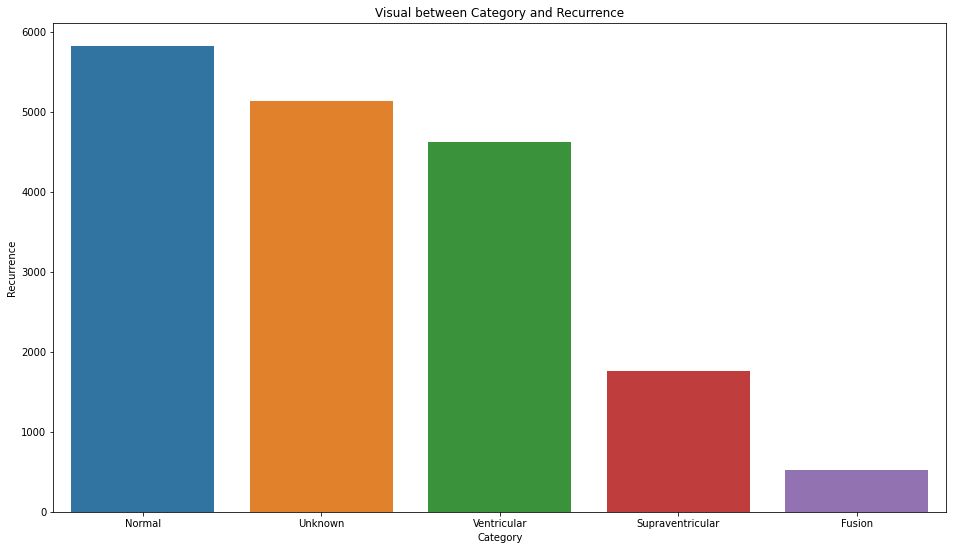

In [36]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Category and Recurrence')
plt.xlabel('Category')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

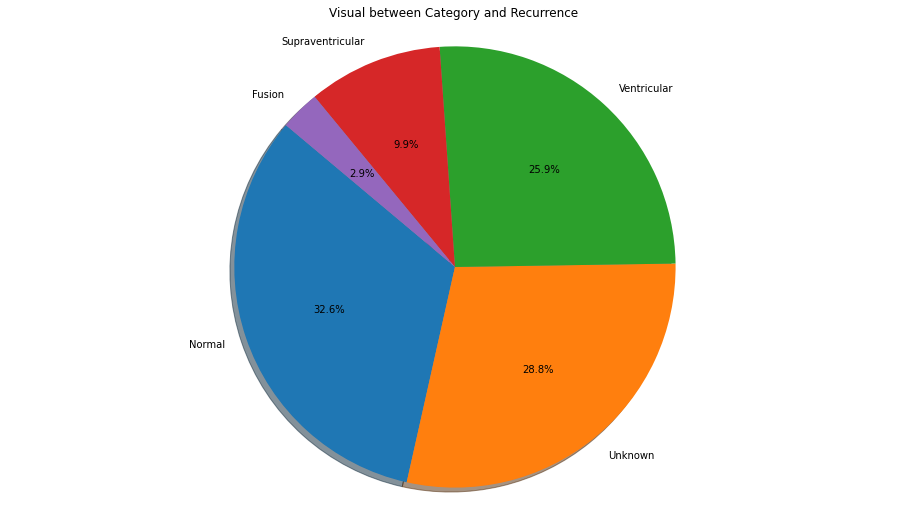

In [37]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Category and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [38]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is Normal which amounts to his recurrence 5824 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


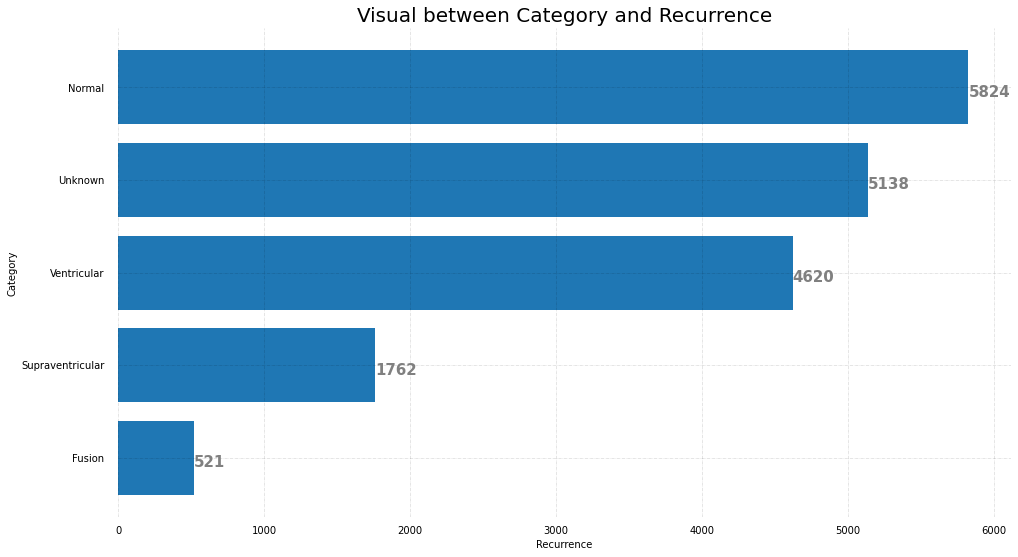

In [39]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Category')
ax.set_title('Visual between Category and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [42]:
df_Normal = df[df['class'] == 0]
df_Unknown = df[df['class'] == 1]
df_Ventricular = df[df['class'] == 2]
df_Supraventricular = df[df['class'] == 3]
df_Fusion = df[df['class'] == 4]

## We will split each of dataframe to three dataframe ( Train , Validate , Test)
#### Train 70%
#### Valid 20%
#### Test 10%

### We will split data of Normal

In [43]:
# data of Normal
df_Normal_old = df_Normal
validate_df_Normal = df_Normal.sample(frac = 0.2)
train_df_Normal = df_Normal.drop(validate_df_Normal.index)
validate_df_Normal = validate_df_Normal.reset_index()
train_df_Normal = train_df_Normal.reset_index()

test_df_Normal = train_df_Normal.sample(frac = 0.1)
train_df_Normal = train_df_Normal.drop(test_df_Normal.index)
test_df_Normal= test_df_Normal.reset_index()
train_df_Normal = train_df_Normal.reset_index()

In [44]:
len(df_Normal_old) , len(train_df_Normal) , len(validate_df_Normal) ,len(test_df_Normal)

(5824, 4193, 1165, 466)

### We will split data of Unknown

In [45]:
# data of Unknown
df_Unknown_old = df_Unknown
validate_df_Unknown = df_Unknown.sample(frac = 0.2)
train_df_Unknown = df_Unknown.drop(validate_df_Unknown.index)
validate_df_Unknown = validate_df_Unknown.reset_index()
train_df_Unknown = train_df_Unknown.reset_index()

test_df_Unknown = train_df_Unknown.sample(frac = 0.1)
train_df_Unknown = train_df_Unknown.drop(test_df_Unknown.index)
test_df_Unknown= test_df_Unknown.reset_index()
train_df_Unknown = train_df_Unknown.reset_index()

In [46]:
len(df_Unknown_old) , len(train_df_Unknown) , len(validate_df_Unknown) ,len(test_df_Unknown)

(5138, 3699, 1028, 411)

### We will split data of Ventricular

In [47]:
# data of Ventricular
df_Ventricular_old = df_Ventricular
validate_df_Ventricular = df_Ventricular.sample(frac = 0.2)
train_df_Ventricular = df_Ventricular.drop(validate_df_Ventricular.index)
validate_df_Ventricular = validate_df_Ventricular.reset_index()
train_df_Ventricular = train_df_Ventricular.reset_index()

test_df_Ventricular = train_df_Ventricular.sample(frac = 0.1)
train_df_Ventricular = train_df_Ventricular.drop(test_df_Ventricular.index)
test_df_Ventricular= test_df_Ventricular.reset_index()
train_df_Ventricular = train_df_Ventricular.reset_index()

In [48]:
len(df_Ventricular_old) , len(train_df_Ventricular) , len(validate_df_Ventricular) ,len(test_df_Ventricular)

(4620, 3326, 924, 370)

### We will split data of Supraventricular

In [49]:
# data of Supraventricular
df_Supraventricular_old = df_Supraventricular
validate_df_Supraventricular = df_Supraventricular.sample(frac = 0.2)
train_df_Supraventricular= df_Supraventricular.drop(validate_df_Supraventricular.index)
validate_df_Supraventricular = validate_df_Supraventricular.reset_index()
train_df_Supraventricular = train_df_Supraventricular.reset_index()

test_df_Supraventricular = train_df_Supraventricular.sample(frac = 0.1)
train_df_Supraventricular = train_df_Supraventricular.drop(test_df_Supraventricular.index)
test_df_Supraventricular = test_df_Supraventricular.reset_index()
train_df_Supraventricular = train_df_Supraventricular.reset_index()

In [50]:
len(df_Supraventricular_old) , len(train_df_Supraventricular) , len(validate_df_Supraventricular) ,len(test_df_Supraventricular)

(1762, 1269, 352, 141)

### We will split data of Fusion

In [51]:
# data of Fusion
df_Fusion_old = df_Fusion
validate_df_Fusion = df_Fusion.sample(frac = 0.2)
train_df_Fusion= df_Fusion.drop(validate_df_Fusion.index)
validate_df_Fusion = validate_df_Fusion.reset_index()
train_df_Fusion = train_df_Fusion.reset_index()

test_df_Fusion = train_df_Fusion.sample(frac = 0.1)
train_df_retinal = train_df_Fusion.drop(test_df_Fusion.index)
test_df_Fusion = test_df_Fusion.reset_index()
train_df_Fusion= train_df_Fusion.reset_index()


In [52]:
len(df_Fusion_old) , len(train_df_Fusion) , len(validate_df_Fusion) ,len(test_df_Fusion)

(521, 417, 104, 42)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [53]:
!mkdir TRAIN  TRAIN/Fusion TRAIN/Supraventricular TRAIN/Ventricular TRAIN/Unknown TRAIN/Normal  
!mkdir VAL  VAL/Fusion VAL/Supraventricular VAL/Ventricular VAL/Unknown VAL/Normal   
!mkdir TEST  TEST/Fusion TEST/Supraventricular TEST/Ventricular TEST/Unknown TEST/Normal  

In [54]:
IMG_SIZE = (300,300)
def process_save_img(size,full_path_img,name_image,new_folder):
    img = cv2.imread(full_path_img)
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(new_folder+'/'+name_image, img)

In [55]:
#DataSet Fusion
for filename in tqdm(train_df_Fusion['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Fusion')
print('finish TRAIN/Fusion')
for filename in tqdm(validate_df_Fusion['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Fusion')
print('finish VAL/Fusion')
for filename in tqdm(test_df_Fusion['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Fusion')
print('finish TEST/Fusion')

#DataSet Supraventricular
for filename in tqdm(train_df_Supraventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Supraventricular')
print('finish TRAIN/Supraventricular')
for filename in tqdm(validate_df_Supraventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Supraventricular')
print('finish VAL/Supraventricular')
for filename in tqdm(test_df_Supraventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Supraventricular')
print('finish TEST/Supraventricular')


#DataSet Ventricular
for filename in tqdm(train_df_Ventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Ventricular')
print('finish TRAIN/Ventricular')
for filename in tqdm(validate_df_Ventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Ventricular')
print('finish VAL/Ventricular')
for filename in tqdm(test_df_Ventricular['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Ventricular')
print('finish TEST/Ventricular')

#DataSet Unknown
for filename in tqdm(train_df_Unknown['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Unknown')
print('finish TRAIN/Unknown')
for filename in tqdm(validate_df_Unknown['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Unknown')
print('finish VAL/Unknown')
for filename in tqdm(test_df_Unknown['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Unknown')
print('finish TEST/Unknown')

#DataSet Normal
for filename in tqdm(train_df_Normal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Normal')
print('finish TRAIN/Normal')
for filename in tqdm(validate_df_Normal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Normal')
print('finish VAL/Normal')
for filename in tqdm(test_df_Normal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Normal')
print('finish TEST/Normal')

100%|██████████| 417/417 [00:02<00:00, 168.25it/s]


finish TRAIN/Fusion


100%|██████████| 104/104 [00:00<00:00, 167.69it/s]


finish VAL/Fusion


100%|██████████| 42/42 [00:00<00:00, 175.65it/s]


finish TEST/Fusion


100%|██████████| 1269/1269 [00:07<00:00, 173.20it/s]


finish TRAIN/Supraventricular


100%|██████████| 352/352 [00:01<00:00, 179.07it/s]


finish VAL/Supraventricular


100%|██████████| 141/141 [00:00<00:00, 180.39it/s]


finish TEST/Supraventricular


100%|██████████| 3326/3326 [00:18<00:00, 177.05it/s]


finish TRAIN/Ventricular


100%|██████████| 924/924 [00:05<00:00, 175.22it/s]


finish VAL/Ventricular


100%|██████████| 370/370 [00:01<00:00, 185.13it/s]


finish TEST/Ventricular


100%|██████████| 3699/3699 [00:22<00:00, 164.09it/s]


finish TRAIN/Unknown


100%|██████████| 1028/1028 [00:05<00:00, 175.05it/s]


finish VAL/Unknown


100%|██████████| 411/411 [00:02<00:00, 164.12it/s]


finish TEST/Unknown


100%|██████████| 4193/4193 [00:23<00:00, 176.30it/s]


finish TRAIN/Normal


100%|██████████| 1165/1165 [00:06<00:00, 182.79it/s]


finish VAL/Normal


100%|██████████| 466/466 [00:02<00:00, 167.14it/s]

finish TEST/Normal


In [56]:
print('Length Of Data { Fusion } Train : ',len(os.listdir('TRAIN/Fusion')))
print('Length Of Data { Fusion } VAL : ',len(os.listdir('VAL/Fusion')))
print('Length Of Data { Fusion } TEST : ',len(os.listdir('TEST/Fusion')))

print('Length Of Data { Supraventricular } Train : ',len(os.listdir('TRAIN/Supraventricular')))
print('Length Of Data { Supraventricular } VAL : ',len(os.listdir('VAL/Supraventricular')))
print('Length Of Data { Supraventricular } TEST : ',len(os.listdir('TEST/Supraventricular')))

print('Length Of Data { Ventricular } Train : ',len(os.listdir('TRAIN/Ventricular')))
print('Length Of Data { Ventricular } VAL : ',len(os.listdir('VAL/Ventricular')))
print('Length Of Data { Ventricular } TEST : ',len(os.listdir('TEST/Ventricular')))

print('Length Of Data { Unknown } Train : ',len(os.listdir('TRAIN/Unknown')))
print('Length Of Data { Unknown } VAL : ',len(os.listdir('VAL/Unknown')))
print('Length Of Data { Unknown } TEST : ',len(os.listdir('TEST/Unknown')))

print('Length Of Data { Normal } Train : ',len(os.listdir('TRAIN/Normal')))
print('Length Of Data { Normal } VAL : ',len(os.listdir('VAL/Normal')))
print('Length Of Data { Normal } TEST : ',len(os.listdir('TEST/Normal')))

Length Of Data { Fusion } Train :  417
Length Of Data { Fusion } VAL :  104
Length Of Data { Fusion } TEST :  42
Length Of Data { Supraventricular } Train :  1269
Length Of Data { Supraventricular } VAL :  352
Length Of Data { Supraventricular } TEST :  141
Length Of Data { Ventricular } Train :  3326
Length Of Data { Ventricular } VAL :  924
Length Of Data { Ventricular } TEST :  370
Length Of Data { Unknown } Train :  3699
Length Of Data { Unknown } VAL :  1028
Length Of Data { Unknown } TEST :  411
Length Of Data { Normal } Train :  4193
Length Of Data { Normal } VAL :  1165
Length Of Data { Normal } TEST :  466


In [57]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [58]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_gen = ImageDataGenerator(rescale = 1./255)

In [59]:
IMG_SIZE = (224,224)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 12904 images belonging to 5 classes.
Found 1430 images belonging to 5 classes.
Found 3573 images belonging to 5 classes.


In [60]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 12904 images belonging to 5 classes.
Found 1430 images belonging to 5 classes.
Found 3573 images belonging to 5 classes.


<a id='demo'></a>
## Demo

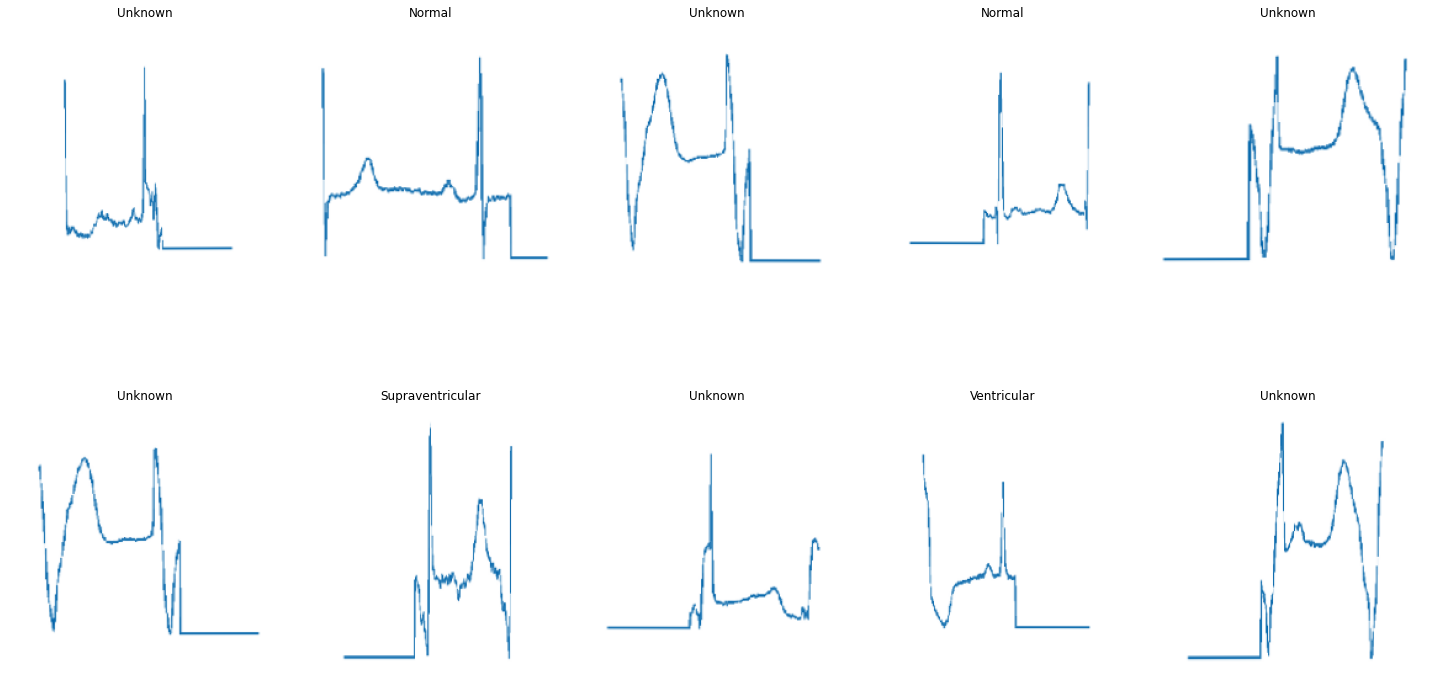

In [62]:
idx2label_dict = {trainRgb.class_indices[k]: k for k in trainRgb.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in trainRgb:
        image = X_batch[0]        
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray')
        break
plt.tight_layout()
plt.show()

In [63]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [64]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',classes = np.unique(trainRgb.classes),y = trainRgb.classes)
cw = dict(zip( np.unique(trainRgb.classes), weights))
print(cw)

{0: 6.188968824940048, 1: 0.6155020271881707, 2: 2.033727344365642, 3: 0.6977020816436875, 4: 0.7759470835838845}


<a id='build'></a>
## Model Building

<a id='scrath'></a>
## Model from Scratch

<a id='scrathf'></a>
## Model from Simple Scratch

In [65]:
input_shape = (224,224,3)
scratchSimple = Sequential()
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Flatten())
scratchSimple.add(Dense(activation = 'relu', units = 128))
scratchSimple.add(Dense(activation = 'relu', units = 64))
scratchSimple.add(Dense(activation = 'softmax', units = 5))
scratchSimple.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchSimple.summary()

2022-06-06 01:16:09.733316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

2022-06-06 01:16:09.873799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 01:16:09.874810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 01:16:09.876847: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 01:16:09.877164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

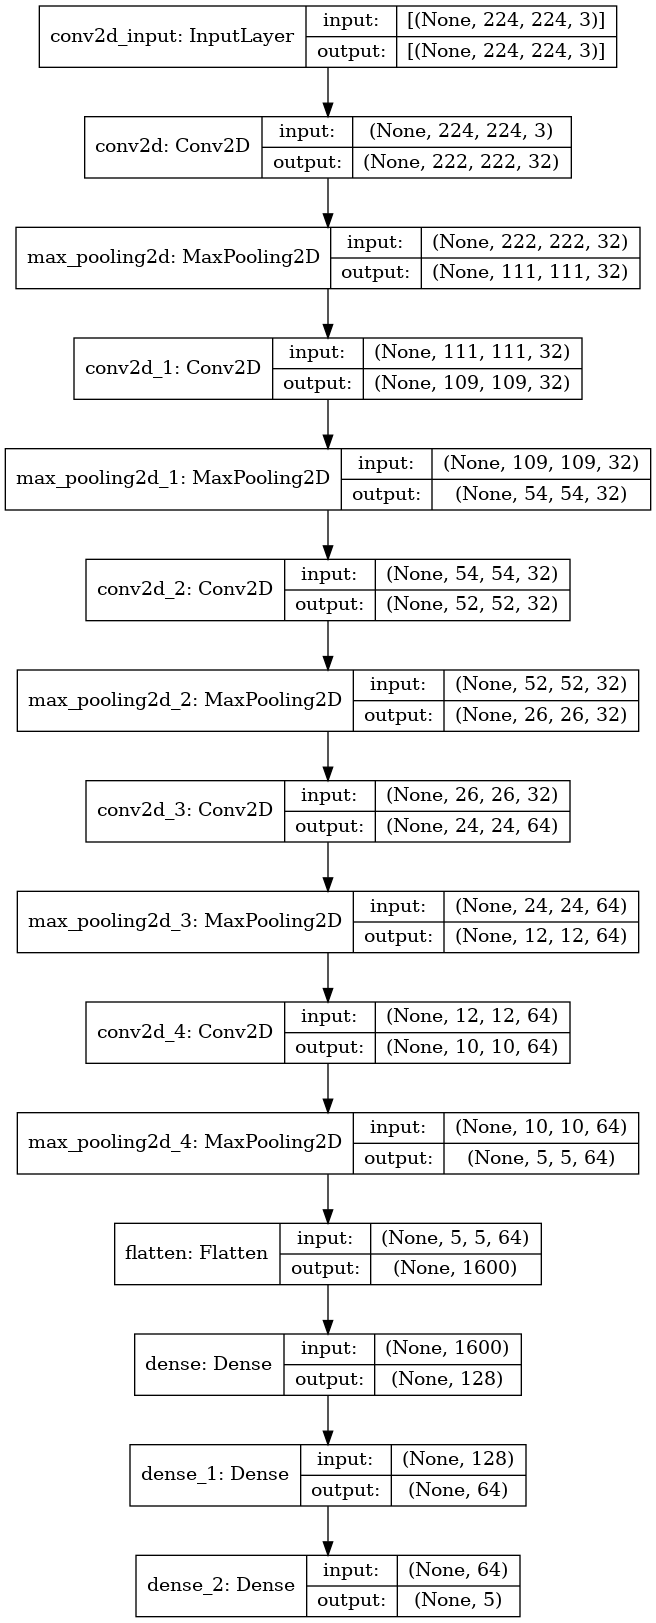

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(scratchSimple,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [67]:
epochs = 30

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-06 01:16:18.291203: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-06-06 01:16:20.572184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


201/201 [==============================] - 161s 764ms/step - loss: 1.0130 - accuracy: 0.5825 - val_loss: 0.6640 - val_accuracy: 0.7520
Epoch 2/30
201/201 [==============================] - 154s 767ms/step - loss: 0.5879 - accuracy: 0.7807 - val_loss: 0.6298 - val_accuracy: 0.7705
Epoch 3/30
201/201 [==============================] - 152s 759ms/step - loss: 0.4821 - accuracy: 0.8265 - val_loss: 0.4900 - val_accuracy: 0.8315
Epoch 4/30
201/201 [==============================] - 157s 780ms/step - loss: 0.4300 - accuracy: 0.8471 - val_loss: 0.3977 - val_accuracy: 0.8517
Epoch 5/30
201/201 [==============================] - 152s 755ms/step - loss: 0.3899 - accuracy: 0.8611 - val_loss: 0.4321 - val_accuracy: 0.8466
Epoch 6/30
201/201 [==============================] - 152s 755ms/step - loss: 0.3667 - accuracy: 0.8717 - val_loss: 0.4327 - val_accuracy: 0.8403

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
201/201 [==============================] - 

In [68]:
scratchSimple.save('./scratchSimpleH.h5')

 <a id='trainVGG16'></a>
## Model VGG16 ( trainable  )

In [69]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16= Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(128,activation='relu'))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Dense(5, activation='softmax'))
model_VGG16.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_______________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [70]:
epochs = 30

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_VGG16.save('./model_VGG16H.h5')

Epoch 1/30
201/201 [==============================] - 183s 873ms/step - loss: 0.9032 - accuracy: 0.6440 - val_loss: 0.7391 - val_accuracy: 0.7685
Epoch 2/30
201/201 [==============================] - 181s 901ms/step - loss: 0.5277 - accuracy: 0.8162 - val_loss: 0.4591 - val_accuracy: 0.8207
Epoch 3/30
201/201 [==============================] - 177s 881ms/step - loss: 0.4040 - accuracy: 0.8572 - val_loss: 0.3338 - val_accuracy: 0.8770
Epoch 4/30
201/201 [==============================] - 179s 891ms/step - loss: 0.3570 - accuracy: 0.8778 - val_loss: 0.3139 - val_accuracy: 0.8903
Epoch 5/30
201/201 [==============================] - 180s 894ms/step - loss: 0.3212 - accuracy: 0.8878 - val_loss: 0.3324 - val_accuracy: 0.8912
Epoch 6/30
201/201 [==============================] - 178s 886ms/step - loss: 0.3068 - accuracy: 0.8917 - val_loss: 0.2486 - val_accuracy: 0.9148
Epoch 7/30
201/201 [==============================] - 181s 898ms/step - loss: 0.2671 - accuracy: 0.9047 - val_loss: 0.2176 -

 <a id='freezeVGG16'></a>
## Model VGG16 ( false trainable )

In [71]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16F= Sequential()
for layer in VGG16.layers:
    layer.trainable = False
model_VGG16F.add(VGG16)
model_VGG16F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16F.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Flatten())
model_VGG16F.add(Dense(128,activation='relu'))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Dense(5, activation='softmax'))
model_VGG16F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16F.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [72]:
epochs = 30

historyVGG16F = model_VGG16F.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16F.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30
201/201 [==============================] - 156s 775ms/step - loss: 1.0727 - accuracy: 0.5742 - val_loss: 0.6427 - val_accuracy: 0.7773
Epoch 2/30
201/201 [==============================] - 155s 772ms/step - loss: 0.6779 - accuracy: 0.7471 - val_loss: 0.5694 - val_accuracy: 0.7838
Epoch 3/30
201/201 [==============================] - 156s 774ms/step - loss: 0.5638 - accuracy: 0.7877 - val_loss: 0.5136 - val_accuracy: 0.7832
Epoch 4/30
201/201 [==============================] - 158s 787ms/step - loss: 0.5083 - accuracy: 0.8109 - val_loss: 0.4107 - val_accuracy: 0.8554
Epoch 5/30
201/201 [==============================] - 157s 780ms/step - loss: 0.4595 - accuracy: 0.8336 - val_loss: 0.3883 - val_accuracy: 0.8673
Epoch 6/30
201/201 [==============================] - 155s 769ms/step - loss: 0.4284 - accuracy: 0.8410 - val_loss: 0.3205 - val_accuracy: 0.8932
Epoch 7/30
201/201 [==============================] - 158s 785ms/step - loss: 0.3996 - accuracy: 0.8565 - val_loss: 0.3588 -

In [73]:
model_VGG16F.save('./model_VGG16FH.h5')

<a id='ResNet152V2'></a>
## Model ResNet152V2 

<a id='trainResNet152V2'></a>
## Model ResNet152V2 ( trainable  )

In [74]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
model_Resnet = Sequential()
model_Resnet.add(ResNet152V2)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(512, activation='relu'))
model_Resnet.add(Dense(5, activation='softmax'))
model_Resnet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Resnet.summary()

234561536/234545216 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2565      
Total params: 109,714,949
Trainable params: 109,571,205
Non-trainable params: 143,744
_________________________________________________________________


In [75]:
epochs = 30
historyResnet = model_Resnet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Resnet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/30
201/201 [==============================] - 231s 1s/step - loss: 0.7067 - accuracy: 0.7703 - val_loss: 0.4676 - val_accuracy: 0.8369
Epoch 2/30
201/201 [==============================] - 215s 1s/step - loss: 0.4255 - accuracy: 0.8545 - val_loss: 0.3429 - val_accuracy: 0.8878
Epoch 3/30
201/201 [==============================] - 214s 1s/step - loss: 0.3331 - accuracy: 0.8797 - val_loss: 0.2591 - val_accuracy: 0.9051
Epoch 4/30
201/201 [==============================] - 214s 1s/step - loss: 0.2815 - accuracy: 0.9029 - val_loss: 0.3007 - val_accuracy: 0.9003
Epoch 5/30
201/201 [==============================] - 217s 1s/step - loss: 0.2507 - accuracy: 0.9139 - val_loss: 0.2723 - val_accuracy: 0.8980

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 6/30
201/201 [==============================] - 215s 1s/step - loss: 0.1740 - accuracy: 0.9376 - val_loss: 0.1708 - val_accuracy: 0.9401
Epoch 7/30
201/201 [==============================] - 215s 1

In [76]:
model_Resnet.save('./model_ResnetH.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<a id='freezeResNet152V2'></a>
## Model ResNet152V2 ( false trainable  )

In [77]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in ResNet152V2.layers:
        layer.trainable=False
model_ResnetF = Sequential()
model_ResnetF.add(ResNet152V2)
model_ResnetF.add(Flatten())
model_ResnetF.add(Dense(512, activation='relu'))
model_ResnetF.add(Dense(5, activation='softmax'))
model_ResnetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_ResnetF.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 2565      
Total params: 109,714,949
Trainable params: 51,383,301
Non-trainable params: 58,331,648
_________________________________________________________________


In [78]:
epochs = 30
historyResnetF = model_ResnetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_ResnetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/30
201/201 [==============================] - 180s 859ms/step - loss: 0.7902 - accuracy: 0.7688 - val_loss: 0.4273 - val_accuracy: 0.8474
Epoch 2/30
201/201 [==============================] - 169s 841ms/step - loss: 0.4202 - accuracy: 0.8521 - val_loss: 0.4736 - val_accuracy: 0.8358
Epoch 3/30
201/201 [==============================] - 169s 840ms/step - loss: 0.3680 - accuracy: 0.8708 - val_loss: 0.3673 - val_accuracy: 0.8639
Epoch 4/30
201/201 [==============================] - 169s 843ms/step - loss: 0.3227 - accuracy: 0.8857 - val_loss: 0.3179 - val_accuracy: 0.8938
Epoch 5/30
201/201 [==============================] - 173s 858ms/step - loss: 0.3079 - accuracy: 0.8931 - val_loss: 0.3514 - val_accuracy: 0.8787
Epoch 6/30
201/201 [==============================] - 169s 840ms/step - loss: 0.2828 - accuracy: 0.9044 - val_loss: 0.3219 - val_accuracy: 0.8869

Epoch 00006: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 7/30
201/201 [======================

In [79]:
model_ResnetF.save('./model_ResnetFH.h5')

<a id='Xception'></a>
## Model Xception 

<a id='aXception'></a>
## Model Xception ( trainable  )           

In [80]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
model_Xception= Sequential()
model_Xception.add(Xception)
model_Xception.add(Conv2D(64, (3, 3), activation = 'relu'))
model_Xception.add(MaxPooling2D(pool_size = (2, 2)))
model_Xception.add(Dropout(0.10))
model_Xception.add(Flatten())
model_Xception.add(Dense(128,activation='relu'))
model_Xception.add(Dropout(0.10))
model_Xception.add(Dense(5, activation='softmax'))
model_Xception.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Xception.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_______________________________________________________

In [81]:
epochs = 30

historyXception = model_Xception.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/30


2022-06-06 06:23:05.785445: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-06 06:23:05.867783: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.59GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-06 06:23:06.107993: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-06 06:23:06.279353: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

 59/201 [=======>......................] - ETA: 2:19 - loss: 1.3027 - accuracy: 0.4412

2022-06-06 06:24:04.748012: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.68GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-06 06:24:04.995865: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-06 06:24:05.132097: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


201/201 [==============================] - 215s 1s/step - loss: 0.8198 - accuracy: 0.6733 - val_loss: 1.2486 - val_accuracy: 0.5281
Epoch 2/30
201/201 [==============================] - 208s 1s/step - loss: 0.4174 - accuracy: 0.8539 - val_loss: 0.3481 - val_accuracy: 0.8759
Epoch 3/30
201/201 [==============================] - 207s 1s/step - loss: 0.3292 - accuracy: 0.8886 - val_loss: 0.2941 - val_accuracy: 0.8929
Epoch 4/30
201/201 [==============================] - 205s 1s/step - loss: 0.2567 - accuracy: 0.9096 - val_loss: 0.2589 - val_accuracy: 0.9219
Epoch 5/30
201/201 [==============================] - 207s 1s/step - loss: 0.2345 - accuracy: 0.9173 - val_loss: 0.1855 - val_accuracy: 0.9378
Epoch 6/30
201/201 [==============================] - 207s 1s/step - loss: 0.2088 - accuracy: 0.9248 - val_loss: 0.2077 - val_accuracy: 0.9267
Epoch 7/30
201/201 [==============================] - 209s 1s/step - loss: 0.1818 - accuracy: 0.9357 - val_loss: 0.2042 - val_accuracy: 0.9278

Epoch 000

In [82]:
model_Xception.save('./model_XceptionH.h5')

<a id='bXception'></a>
## Model Xception ( false trainable  )    

In [83]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in Xception.layers:
    layer.trainable = False
model_XceptionF = Sequential()
model_XceptionF.add(Xception)
model_XceptionF.add(Conv2D(64, (3, 3), activation = 'relu'))
model_XceptionF.add(MaxPooling2D(pool_size = (2, 2)))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Flatten())
model_XceptionF.add(Dense(128,activation='relu'))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Dense(5, activation='softmax'))
model_XceptionF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_XceptionF.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [ ]:
epochs = 30

historyXceptionF = model_XceptionF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_XceptionF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_XceptionF.save('./model_XceptionFH.h5')

 <a id='MobileNet'></a>
## Model MobileNet  

# <a id='trainMobileNet'></a>
## Model MobileNet (  trainable  )    

In [ ]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,weights='imagenet')
model_MobileNet = Sequential()
model_MobileNet.add(MobileNet)
model_MobileNet.add(Flatten())
model_MobileNet.add(Dense(512, activation='relu'))
model_MobileNet.add(Dense(5, activation='softmax'))
model_MobileNet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNet.summary()

In [ ]:
epochs = 30

historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_MobileNet.save('./model_MobileNetH.h5')

 <a id='freezeMobileNet'></a>
## Model MobileNet ( false trainable  )    

In [ ]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,pooling='avg',classes=4,weights='imagenet')
for layer in MobileNet.layers:
        layer.trainable=False
model_MobileNetF = Sequential()
model_MobileNetF.add(MobileNet)
model_MobileNetF.add(Flatten())
model_MobileNetF.add(Dense(512, activation='relu'))
model_MobileNetF.add(Dense(5, activation='softmax'))
model_MobileNetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNetF.summary()

In [ ]:
epochs = 30

historyMobileNetF = model_MobileNetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_MobileNetF.save('./model_MobileNetFH.h5')

<a id='InceptionV3'></a>
## Model InceptionV3 

<a id='trainInceptionV3'></a>
## Model InceptionV3 ( trainable )    

In [ ]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
model_InceptionV3= Sequential()
model_InceptionV3.add(InceptionV3)
model_InceptionV3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(128,activation='relu'))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Dense(5, activation='softmax'))
model_InceptionV3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3.summary()

In [ ]:
epochs = 30

historyInception = model_InceptionV3.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_InceptionV3.save('./model_InceptionV3H.h5')

<a id='freezeInceptionV3'></a>
## Model InceptionV3 ( false trainable  )    

In [ ]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in InceptionV3.layers:
    layer.trainable = False
model_InceptionV3F= Sequential()
model_InceptionV3F.add(InceptionV3)
model_InceptionV3F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3F.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Flatten())
model_InceptionV3F.add(Dense(128,activation='relu'))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Dense(5, activation='softmax'))
model_InceptionV3F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3F.summary()

In [ ]:
epochs = 30

historyInceptionV3F = model_InceptionV3F.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3F.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
model_InceptionV3F.save('./model_InceptionV3FH.h5')

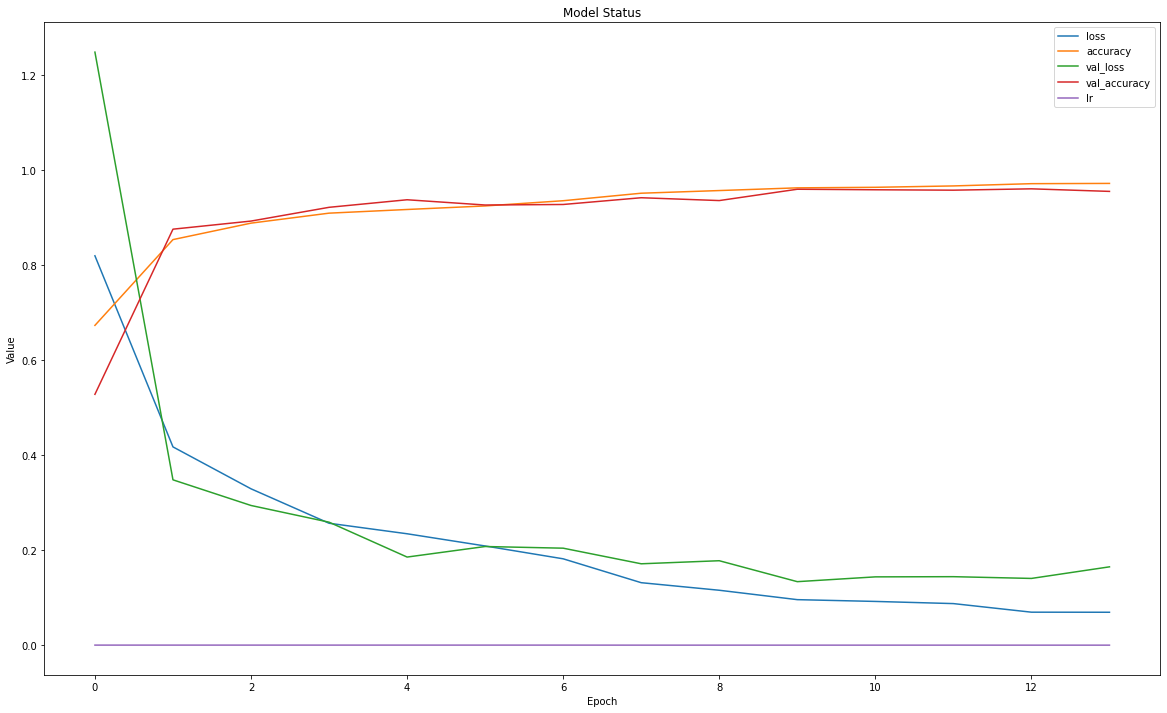

In [86]:
pd.DataFrame(historyXception.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

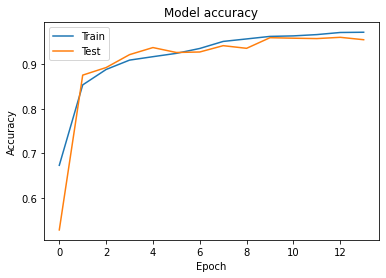

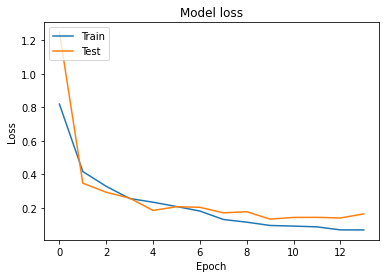

In [87]:
plt.plot(historyXception.history['accuracy'])
plt.plot(historyXception.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historyXception.history['loss'])
plt.plot(historyXception.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<a id='perf'></a>
## Model Performance

In [90]:
test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

1430/1430 [==============================] - 16s 11ms/step - loss: 0.1445 - accuracy: 0.9601
The testing accuracy is : 96.01398706436157 %


In [91]:
from keras.models import load_model
model = load_model('./model_XceptionH.h5')

In [92]:
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
idx2label_dict

{0: 'Fusion',
 1: 'Normal',
 2: 'Supraventricular',
 3: 'Unknown',
 4: 'Ventricular'}

1430/1430 [==============================] - 16s 11ms/step - loss: 0.1445 - accuracy: 0.9601
The testing accuracy is : 96.01398706436157 %
confusion matrix :
 [[ 41   0   0   0   1]
 [  1 443  14   0   8]
 [  1   5 135   0   0]
 [  0   4   2 400   5]
 [  3   8   5   0 354]]
Precision Score :  0.9601398601398602
Recall Score :  0.9601398601398602
classification_report :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.96      0.95      0.96       466
           2       0.87      0.96      0.91       141
           3       1.00      0.97      0.99       411
           4       0.96      0.96      0.96       370

    accuracy                           0.96      1430
   macro avg       0.94      0.96      0.95      1430
weighted avg       0.96      0.96      0.96      1430



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


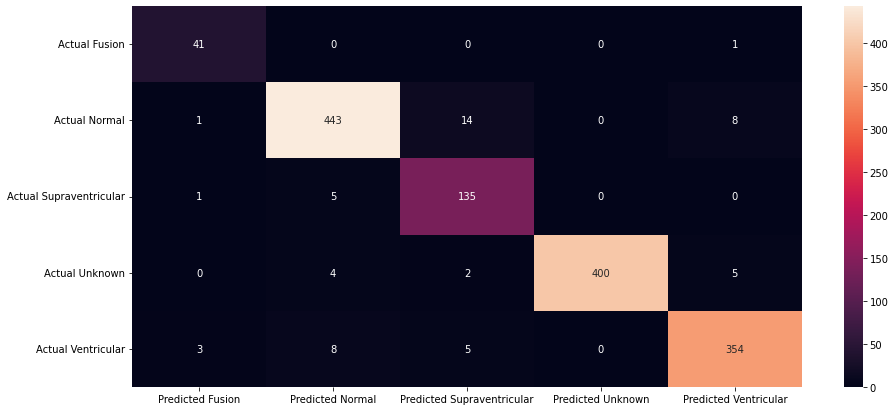

In [101]:
predict_x=model_Xception.predict(testRgb) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
y_true = testRgb.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3,4]),
                  index=["Actual " + idx2label_dict[0],
                         "Actual " + idx2label_dict[1],
                         "Actual " + idx2label_dict[2],
                         "Actual " + idx2label_dict[3],
                         "Actual " + idx2label_dict[4]],
                  
                  columns=["Predicted "+ idx2label_dict[0],
                           "Predicted "+ idx2label_dict[1],
                           "Predicted "+ idx2label_dict[2],
                           "Predicted "+ idx2label_dict[3],
                           "Predicted "+ idx2label_dict[4]])

seaborn.heatmap(cm,annot=True,fmt="d");

test_accuracy = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

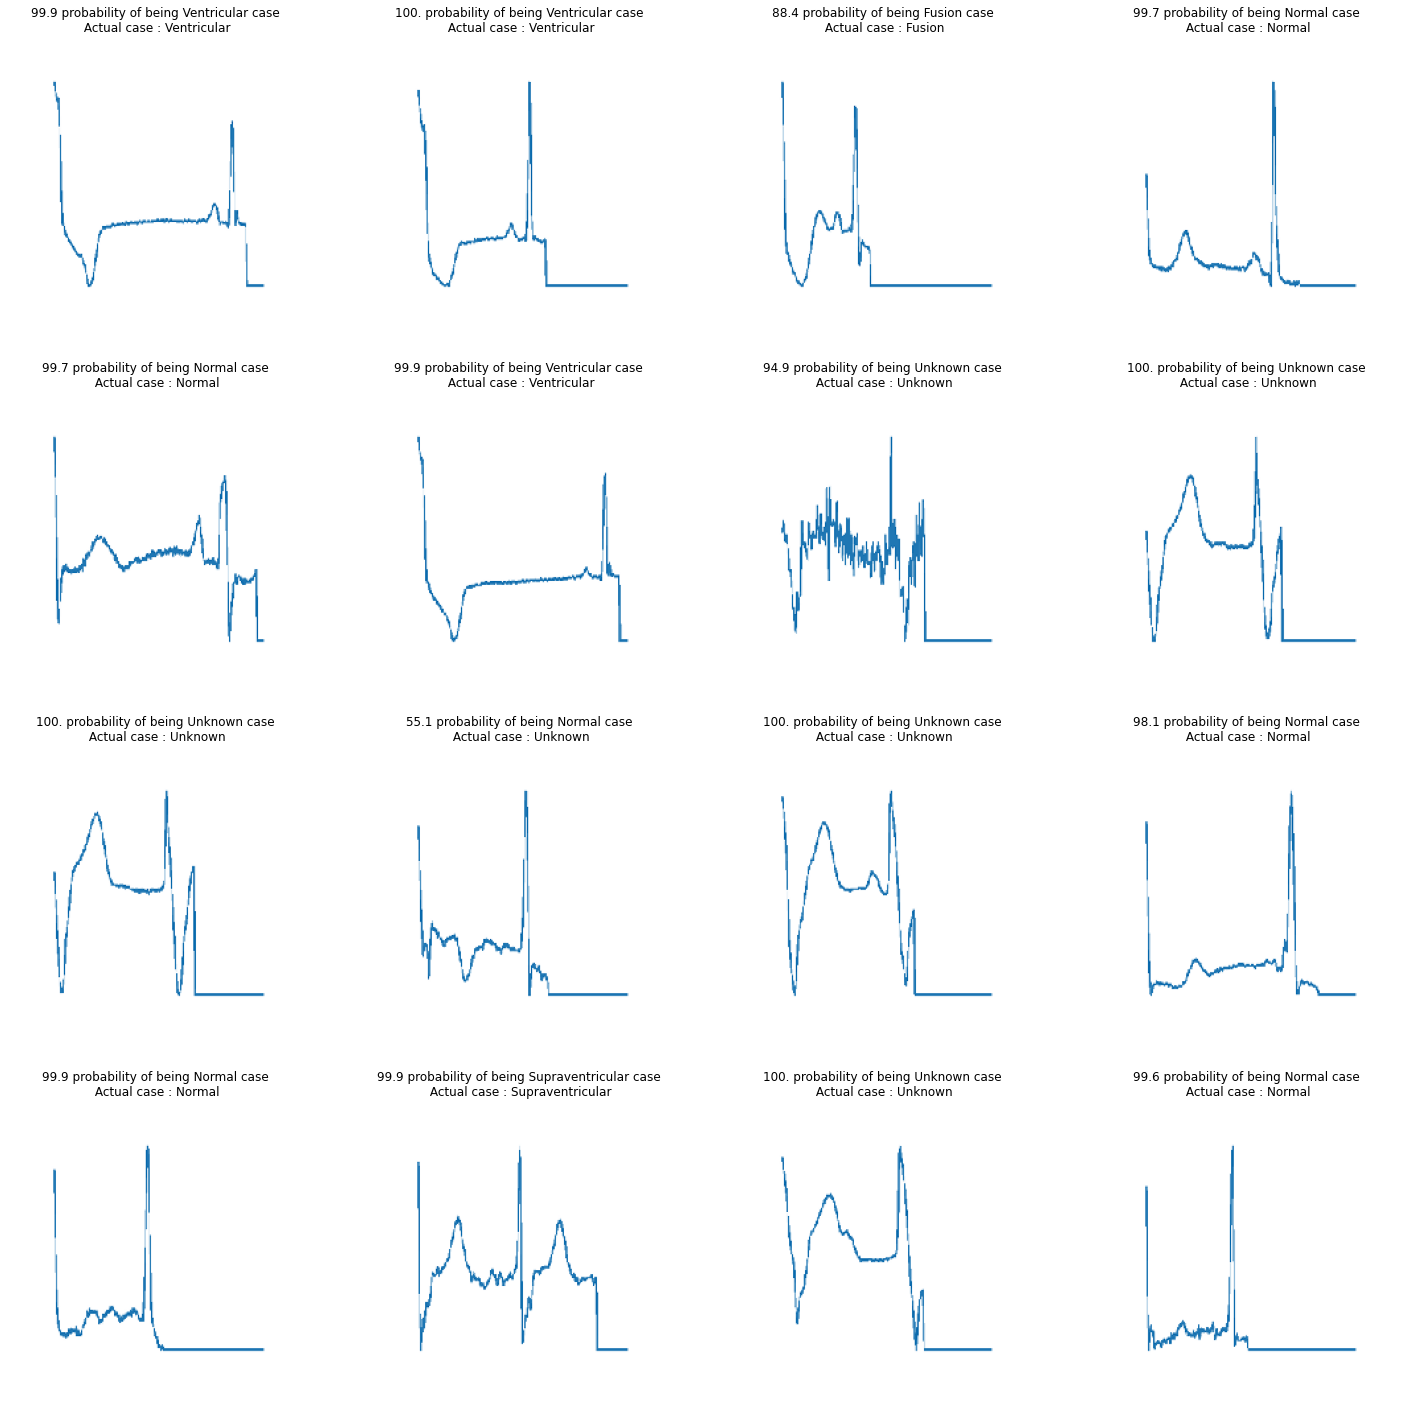

In [105]:
plt.figure(figsize=(25,25))
randomlist = random.sample(range(0, len(testRgb)-1), 16)
index_list = 0
for i in range(0+228, 16+228):
        plt.subplot(4, 4, (i-228)+1)
        index = np.argmax(predict_x[randomlist[index_list]],axis=0)
        out = str(predict_x[randomlist[index_list]][index]*100)[:4] + ' probability of being '+idx2label_dict[y_pred[randomlist[index_list]]]+' case'
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(testRgb[randomlist[index_list]][0]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [104]:
img = cv2.imread('../input/heartbeats/TRAIN/Fusion/Fusion1001.png')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model_Xception.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)

[0] [[9.9948561e-01 5.5923661e-06 1.5340175e-06 1.9346817e-08 5.0720468e-04]]
[0] [9.9948563e+01 5.5923662e-04 1.5340175e-04 1.9346817e-06 5.0720468e-02]
[0] 0.0005592366051132558


<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [106]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = './model_VGG16H.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("./model_VGG16H.tflite","wb").write(tflite_model)

2022-06-06 07:57:02.531043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 07:57:02.531428: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-06 07:57:02.531561: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-06 07:57:02.532034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 07:57:02.532456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 07:57:02.532771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

60183804

In [107]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./model_VGG16H.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.float32'>

1 output(s):
[1 5] <class 'numpy.float32'>
